# Exploration of ZCTAs, Census Places, and NCR Points

This notebook explores the tabular relationships between our zip code / place name dictionary, our NCR place names, census zip code tabulation polygons, and census place polygons.

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

## Zip code / place name dictionary

The dictionary below was compiled using the [zipcodebase](https://zipcodebase.com/) API, which is explored in another notebook. We have to add two records and remove one, but otherwise this seems to be complete. In this notebook, we will simply refer to this as our "zipcode dictionary". Let's load it and ask some questions.

In [3]:
# load zipcode dict from zipcodebase, add the missing zips/places, and remove the erroroneous zip code
place_zip_dict = {'Delta Junction': ['99737'],
 'South Naknek': ['99670'],
 'Sand Point': ['99661'],
 'Chignik': ['99564'],
 'Kalskag': ['99607'],
 'Coffman Cove': ['99918'],
 'Nome': ['99762'],
 'Juneau': ['99801', '99802', '99803', '99811', '99812', '99850'],
 'Lower Kalskag': ['99626'],
 'Shageluk': ['99665'],
 'Hope': ['99605'],
 'Pelican': ['99832'],
 'Kotlik': ['99620'],
 'Iliamna': ['99606'],
 'Eek': ['99578'],
 'Soldotna': ['99669'],
 'Auke Bay': ['99821'],
 'Homer': ['99603'],
 'Anvik': ['99558'],
 'Kasilof': ['99610'],
 'Two Rivers': ['99716'],
 'Pilot Station': ['99650'],
 'Stevens Village': ['99774'],
 'Saint Marys': ['99658'],
 'Wrangell': ['99929'],
 'Northway': ['99764'],
 'Deering': ['99736'],
 'Arctic Village': ['99722'],
 'Shishmaref': ['99772'],
 'Teller': ['99778'],
 'Hoonah': ['99829'],
 'Eagle River': ['99577'],
 'North Pole': ['99705'],
 'Chugiak': ['99567'],
 'Ouzinkie': ['99644'],
 'Denali National Park': ['99755'],
 'Ruby': ['99768'],
 'Mc Grath': ['99627'],
 'Noorvik': ['99763'],
 'Fort Wainwright': ['99703'],
 'Meyers Chuck': ['99903'],
 'Kipnuk': ['99614'],
 'Wales': ['99783'],
 'Takotna': ['99675'],
 'Cantwell': ['99729'],
 'Kake': ['99830'],
 'Elim': ['99739'],
 'Copper Center': ['99573'],
 'Chitina': ['99566'],
 'Koyukuk': ['99754'],
 'Wasilla': ['99623', '99629', '99654', '99687'],
 'Savoonga': ['99769'],
 'Emmonak': ['99581'],
 'Dutch Harbor': ['99692'],
 'King Salmon': ['99613'],
 'Hydaburg': ['99922'],
 'Seward': ['99664'],
 'Clear': ['99704'],
 'Rampart': ['99767'],
 'Klawock': ['99925'],
 'Chignik Lake': ['99548'],
 'Selawik': ['99770'],
 'Salcha': ['99714'],
 'Tatitlek': ['99677'],
 'Anaktuvuk Pass': ['99721'],
 'Yakutat': ['99689'],
 'Nulato': ['99765'],
 'Wainwright': ['99782'],
 'Galena': ['99741'],
 'Gakona': ['99586'],
 'Central': ['99730'],
 'Kwethluk': ['99621'],
 'Circle': ['99733'],
 'Quinhagak': ['99655'],
 'Port Alexander': ['99836'],
 'Akutan': ['99553'],
 'Tok': ['99780', '31120', '99779'],
 'Sitka': ['99835'],
 'Elfin Cove': ['99825'],
 'Gambell': ['99742'],
 'Valdez': ['99686'],
 'Hyder': ['99923'],
 'Metlakatla': ['99926'],
 'Kasigluk': ['99609'],
 'Goodnews Bay': ['99589'],
 'Point Baker': ['99927'],
 'Ward Cove': ['99928'],
 'Unalakleet': ['99684'],
 'Holy Cross': ['99602'],
 'Prudhoe Bay': ['99734'],
 'Trapper Creek': ['99683'],
 'Barrow': ['99723'],
 'Nikolai': ['99691'],
 'Huslia': ['99746'],
 'Angoon': ['99820'],
 'Nikiski': ['99635'],
 'Kaltag': ['99748'],
 'Douglas': ['99824'],
 'Chignik Lagoon': ['99565'],
 'Bethel': ['99559'],
 'Stebbins': ['99671'],
 'Healy': ['99743'],
 'Dillingham': ['99576'],
 'Akiak': ['99552'],
 'Pedro Bay': ['99647'],
 'Hughes': ['99745'],
 'Old Harbor': ['99643'],
 'Tanana': ['99777'],
 'Moose Pass': ['99631'],
 'Point Hope': ['99766'],
 'Koyuk': ['99753'],
 'Egegik': ['99579'],
 'Nondalton': ['99640'],
 'Platinum': ['99651'],
 'Nikolski': ['99638'],
 'Port Heiden': ['99549'],
 'Nunapitchuk': ['99641'],
 'Anchor Point': ['99556'],
 'Napakiak': ['99634'],
 'Kongiganak': ['99545'],
 'Marshall': ['99585'],
 'Port Alsworth': ['99653'],
 'Tuluksak': ['99679'],
 'Ambler': ['99786'],
 'Haines': ['99827'],
 'Craig': ['99921'],
 'Ekwok': ['99580'],
 'Kodiak': ['99615', '99619', '99697'],
 'Anderson': ['99744'],
 'Sutton': ['99674'],
 'Chevak': ['99563'],
 'Grayling': ['99590'],
 'Big Lake': ['99652'],
 'Cooper Landing': ['99572'],
 'Eagle': ['99738'],
 'Atka': ['99547'],
 'Cold Bay': ['99571'],
 'Manokotak': ['99628'],
 'Venetie': ['99781'],
 'Adak': ['99546'],
 'Shungnak': ['99773'],
 'Lake Minchumina': ['99757'],
 'Tanacross': ['99776'],
 'Brevig Mission': ['99785'],
 'Nenana': ['99760'],
 'Levelock': ['99625'],
 'Clam Gulch': ['99568'],
 'Ninilchik': ['99639'],
 'Scammon Bay': ['99662'],
 'Clarks Point': ['99569'],
 'Girdwood': ['99587'],
 'Naknek': ['99633'],
 'Unalaska': ['99685'],
 'Saint George Island': ['99591'],
 'Russian Mission': ['99657'],
 'Saint Michael': ['99659'],
 'Karluk': ['99608'],
 'Fort Yukon': ['99740'],
 'Larsen Bay': ['99624'],
 'Manley Hot Springs': ['99756'],
 'Ester': ['99725'],
 'Tenakee Springs': ['99841'],
 'Kotzebue': ['99752'],
 'Eielson Afb': ['99702'],
 'Mountain Village': ['99632'],
 'False Pass': ['99583'],
 'Chicken': ['99732'],
 'Jber': ['99505', '99506'],
 'Alakanuk': ['99554'],
 'Noatak': ['99761'],
 'Kiana': ['99749'],
 'Aleknagik': ['99555'],
 'Fairbanks': ['99701',
  '99706',
  '99707',
  '99708',
  '99709',
  '99710',
  '99711',
  '99712',
  '99775',
  '99790'],
 'Crooked Creek': ['99575'],
 'Tuntutuliak': ['99680'],
 'Kwigillingok': ['99622'],
 'Glennallen': ['99588'],
 'Beaver': ['99724'],
 'Hooper Bay': ['99604'],
 'Atqasuk': ['99791'],
 'White Mountain': ['99784'],
 'Nuiqsut': ['99789'],
 'Gustavus': ['99826'],
 'Sterling': ['99672'],
 'Nunam Iqua': ['99666'],
 'Point Lay': ['99759'],
 'Aniak': ['99557'],
 'Whittier': ['99693'],
 'Buckland': ['99727'],
 'Minto': ['99758'],
 'Mekoryuk': ['99630'],
 'Houston': ['99694'],
 'Red Devil': ['99656'],
 'Kenai': ['99611'],
 'Toksook Bay': ['99637'],
 'Chefornak': ['99561'],
 'Indian': ['99540'],
 'Kaktovik': ['99747'],
 'Kobuk': ['99751'],
 'Talkeetna': ['99676'],
 'Saint Paul Island': ['99660'],
 'Allakaket': ['99720'],
 'Skagway': ['99840'],
 'Togiak': ['99678'],
 'Shaktoolik': ['99771'],
 'Palmer': ['99645'],
 'King Cove': ['99612'],
 'Anchorage': ['99501',
  '99502',
  '99503',
  '99504',
  '99507',
  '99508',
  '99509',
  '99510',
  '99511',
  '99513',
  '99514',
  '99515',
  '99516',
  '99517',
  '99518',
  '99519',
  '99520',
  '99521',
  '99522',
  '99523',
  '99524',
  '99529',
  '99530',
  '99599',
  '99695',
  '99512'],
 'Akiachak': ['99551'],
 'Tyonek': ['99682'],
 'Petersburg': ['99833'],
 'Cordova': ['99574'],
 'Willow': ['99688'],
 'Sleetmute': ['99668'],
 'Port Lions': ['99550'],
 'Bettles Field': ['99726'],
 'Tununak': ['99681'],
 'Fort Greely': ['99731'],
 'Pilot Point': ['99649'],
 'Perryville': ['99648'],
 'Seldovia': ['99663'],
 'Thorne Bay': ['99919'],
 'Skwentna': ['99667'],
 'Nightmute': ['99690'],
 'Chalkyitsik': ['99788'],
 'Ketchikan': ['99901', '99950']}

place_zip_dict['New Stuyahok']=[99636]
place_zip_dict['Kivalina']=[99750]
place_zip_dict.update({'Tok':['99780', '99779']})

How many places in the zip code dictionary have more than one zip code associated with them? This is good to know, because one of the advantages of working with zip codes is that we can aggregate multiple units that make up a city or town that an average person would usually consider to be one unit. As we can see below, only a handful of places have more than one zip code, and most of these are in highly populated areas.

In [4]:
multiple_zips = []
for key in place_zip_dict.keys():
    if len(place_zip_dict[key])>1: multiple_zips.append(key)
print(f"{len(multiple_zips)} places have more than one associated zip code...")
print(multiple_zips)

8 places have more than one associated zip code...
['Juneau', 'Wasilla', 'Tok', 'Kodiak', 'Jber', 'Fairbanks', 'Anchorage', 'Ketchikan']


But what about the reverse situation: do any zip codes correspond to more than one place? Turns out that no zip codes reference more than one place name.

In [5]:
# create master list of zip codes
all_zips = []
for key in place_zip_dict.keys():
    all_zips.append(place_zip_dict[key])
zips = list(set(chain(*all_zips)))

# create an empty dict with those codes as keys
zip_place_dict = {}
for zipcode in zips:
    zip_place_dict[zipcode]=[]

# populate the dict with lists of associated places
for key in place_zip_dict.keys():
    for zipcode in place_zip_dict[key]:
        zip_place_dict[zipcode].append(key)

# count instances of multiple places
multiple_places = []
for key in zip_place_dict.keys():
    if len(zip_place_dict[key])>1: multiple_places.append(key)

print(f"{len(multiple_places)} zipcodes have more than one associated place...")
print(multiple_places)

0 zipcodes have more than one associated place...
[]


OK so we know we have a one-to-many relationship between place names and zip codes, and a one-to-one relationship between zip codes and place names. That is true in the tabular sense, but we don't really know how this plays out in a spatial sense. Since every zip code is actually associated with a polygon, we might be able to visually assess the 1-to-1 relationship and see how it holds up.

## NCR places, Census ZCTAs, and Census Places

For this analysis we will use the zip code tabulation areas (ZCTAs) and places polygons from the US census (downloaded from [here](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)). These will be plotted alongside SNAP's collection of point data for named places. Note that these points are not all populated communities; they include some unpopulated/formerly populated towns/cities/mines, plus some state parks, wildlife refuges, etc.


In [6]:
# load polygons (convert to 3338 and limit to AK if needed)
ak = gpd.read_file('shp/tl_2023_us_state.shp').query("STUSPS=='AK'").to_crs('EPSG:3338')
boro = gpd.read_file('shp/tl_2023_us_county.shp').to_crs('EPSG:3338').sjoin(ak, how="inner", predicate="within")
place = gpd.read_file('shp/tl_2023_02_place.shp').to_crs('EPSG:3338')
#tract = gpd.read_file('shp/tl_2023_02_tract.shp')
zcta = gpd.read_file('shp/tl_2023_us_zcta520.shp').to_crs('EPSG:3338').sjoin(ak, how="inner", predicate="within").drop(columns=['index_right'])

# load points (convert to 3338)
ak_points_csv = pd.read_csv('shp/alaska_point_locations.csv')
ak_points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(ak_points_csv.longitude, ak_points_csv.latitude, crs="EPSG:4326"), data=ak_points_csv).to_crs('EPSG:3338')

Before we plot anything, let's just do a quick topology check. Since we don't know much about the polygon data, we will test if ZCTA/place polygons are mutually exclusive (ie, non-overlapping). We need to know this before we do any overlay / intersection type analysis. So let's create a function and run both of those polygon layers through it.

In [7]:
# input gdf must have a column named "geometry" and a field with unique IDs for each polygon
# threshold is in squared CRS units (for 3338 will be square meters)
# returns a gdf of overlapping areas

def check_for_overlaps(gdf, id, threshold):
    data_overlaps=gpd.GeoDataFrame(columns=gdf.columns, geometry='geometry', crs=gdf.crs)
    for index, row in gdf.iterrows():
        data_temp1=gdf.loc[gdf[id]!=row[id],]
        # check if intersection occured
        overlaps=data_temp1[data_temp1.geometry.overlaps(row.geometry)][id].tolist()
        if len(overlaps)>0:
            print(overlaps)
            # compare the area with threshold
            for y in overlaps:
                temp_area=gpd.overlay(gdf.loc[gdf[id]==y,],gdf.loc[gdf[id]==row[id],],how='intersection')
                temp_area=temp_area.loc[temp_area.geometry.area>=threshold]
                if temp_area.shape[0]>0:
                    data_overlaps=gpd.GeoDataFrame(pd.concat([temp_area,data_overlaps],ignore_index=True),crs=gdf.crs)
    return data_overlaps


In [8]:
# are there any overlapping polygons in the census places or ZCTAs?
place_overlaps = check_for_overlaps(place, "GEOID", 10)
zcta_overlaps = check_for_overlaps(zcta, "ZCTA5CE20", 10)

print(len(place_overlaps))
print(len(zcta_overlaps))

0
0


Great, now we know that our topology will allow us to do overlay and intersection analyses without double-counting points or making other spatial errors. Let's plot the data statewide to see what we are working with. We can see the general data extent, and we know that neithewr polygon layer offers a wall-to-wall coverage of the state. Beyond that, its hard to really assess what's happening at this scale.

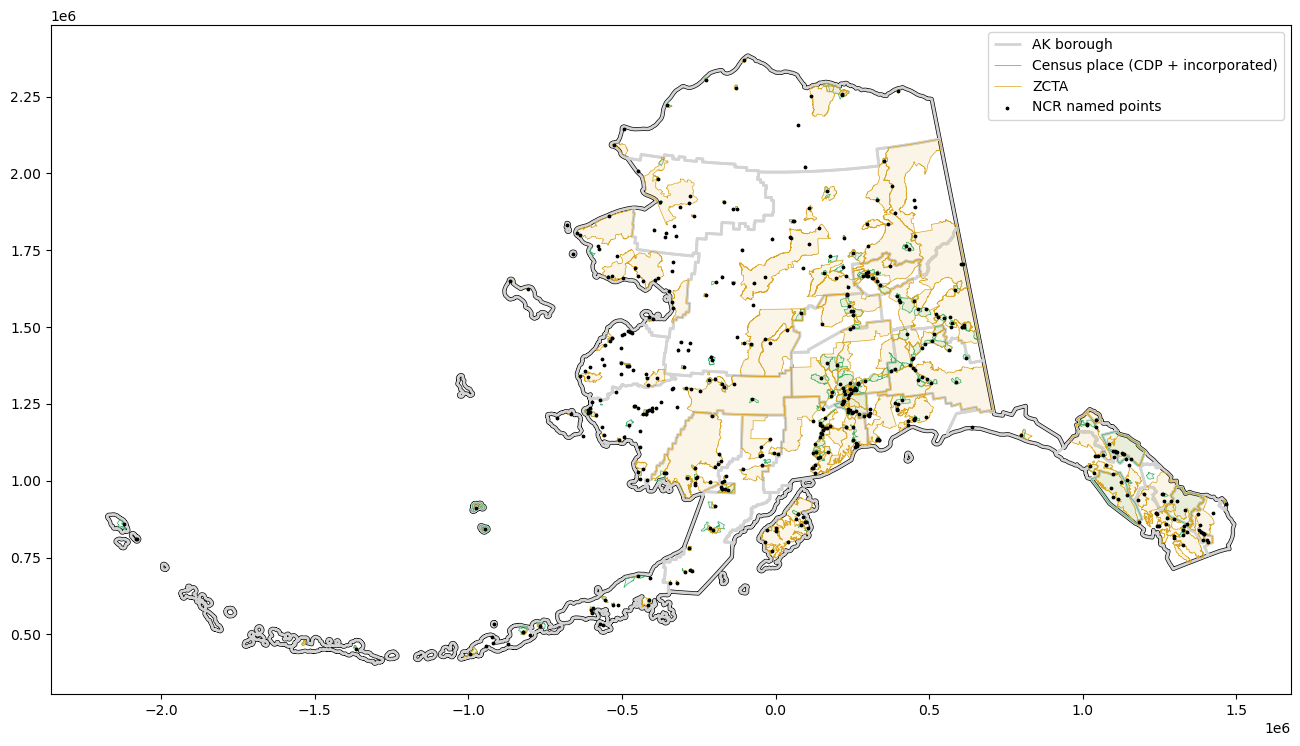

In [11]:
fig, ax = plt.subplots(figsize=(16,12))

ak.boundary.plot(ax=ax, color="black", linewidth=3, zorder=0)
boro.boundary.plot(ax=ax, color="lightgray", linewidth=2, zorder=1, label="AK borough")
place.boundary.plot(ax=ax, color="mediumseagreen", linewidth=.5, zorder=2, label="Census place (CDP + incorporated)")
place.plot(ax=ax, color="mediumseagreen", alpha=.1, linewidth=.5, zorder=2)
zcta.boundary.plot(ax=ax, color="goldenrod", linewidth=.5, zorder=3, label="ZCTA")
zcta.plot(ax=ax, color="goldenrod", alpha=.1, linewidth=.5, zorder=3)
ak_points.plot(ax=ax, color="black", markersize=3, zorder=4, label="NCR named points")

ax.legend()

Let's try to plot the data by general geographic region. For each region, we will count all NCR points in the visible extent. We will also count all NCR points that fall within ZCTA polygons or Places polygons. Keep in mind that even if all NCR points are not accounted for, that does not mean we are missing populated places (see the note on NCR points above). 

What we see here is that ZCTAs are generally larger polygons than the Places. In nearly all cases, there are also fewer ZCTA polygons than Place polygons. It's easy to find some places where one ZCTA or Place polygon contains multiple NCR points, but this appears to happen more frequently with ZCTA polygons. So even though we have a one-to-one relationship in our dictionary between zip codes and place names, this spatial analysis raises the possibility that our dictionary may only list one place name per zip code when in fact there could be more than one place occuring in the ZCTA polygon.

Does this mean that Place polygons are more "granular" than ZCTAs? It's hard to say, since most of these populated places cover small areal extents. The ZCTA polygons seem to fill in the gaps between the populated places, but we wouldn't know if there are more or less data aggregated by Place or ZCTA unless we compared the data products directly.

Regarding the total number of NCR points overlapped by these polygons, we see that more NCR points are captured by the larger ZCTA polygons. But it seems that the additional points here are mostly unpopulated places. Since most of the communities represented by NCR points occupy small areas, there does not seem to be a big difference in coverage between the two units. Or in other words, we can be reasonably sure that all NCR points for populated places are being captured by both Places and ZCTAs.

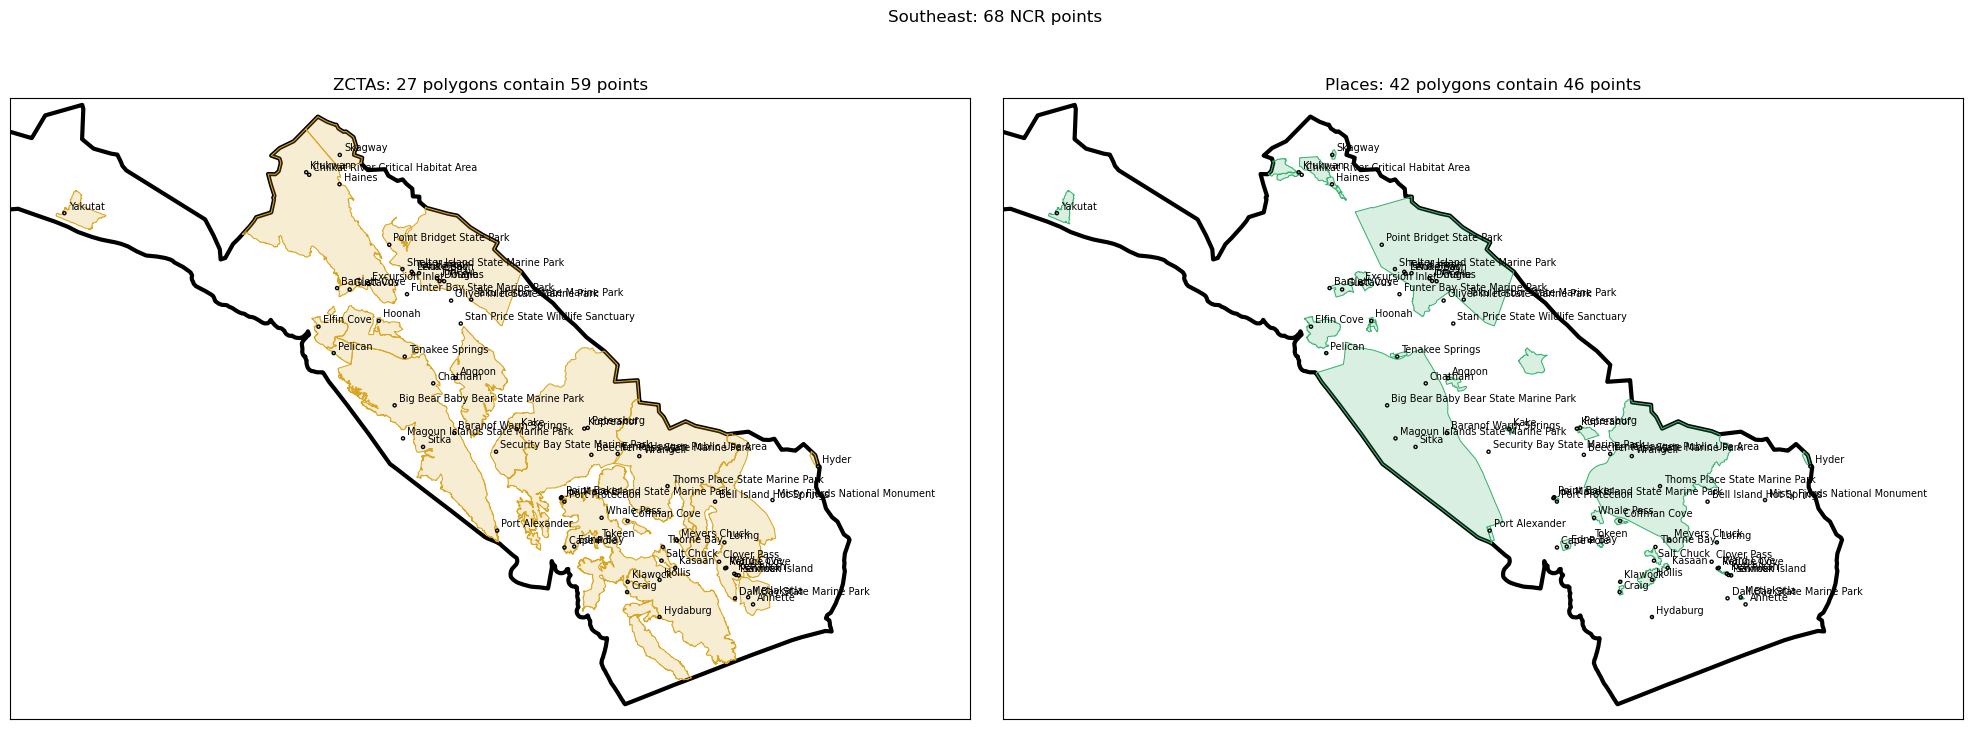

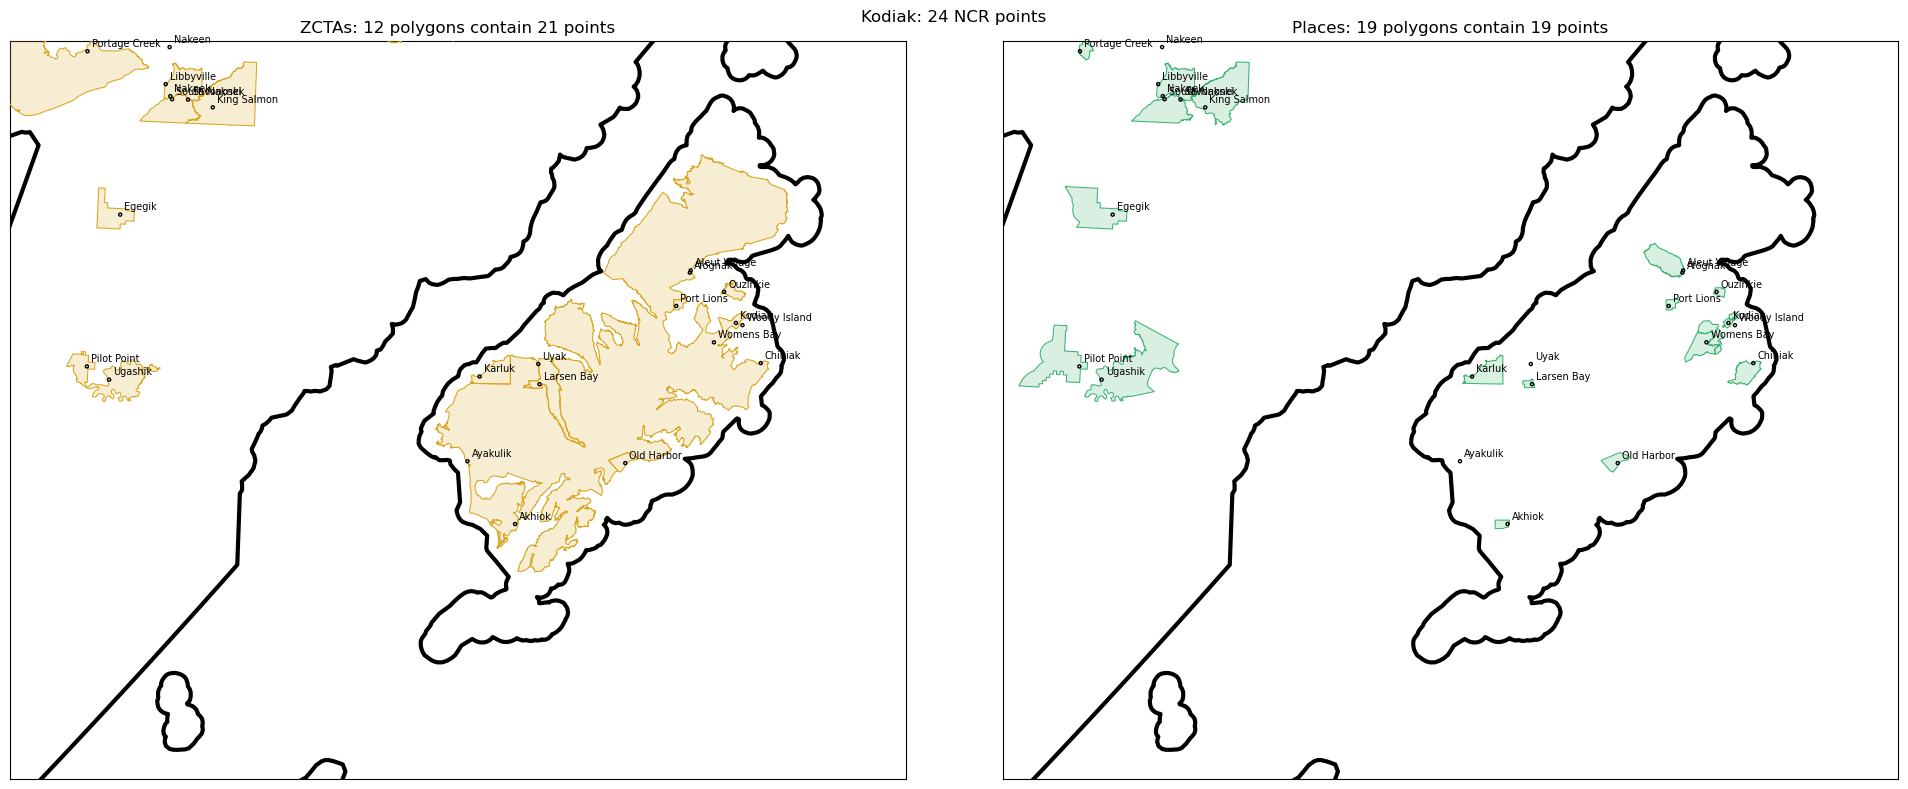

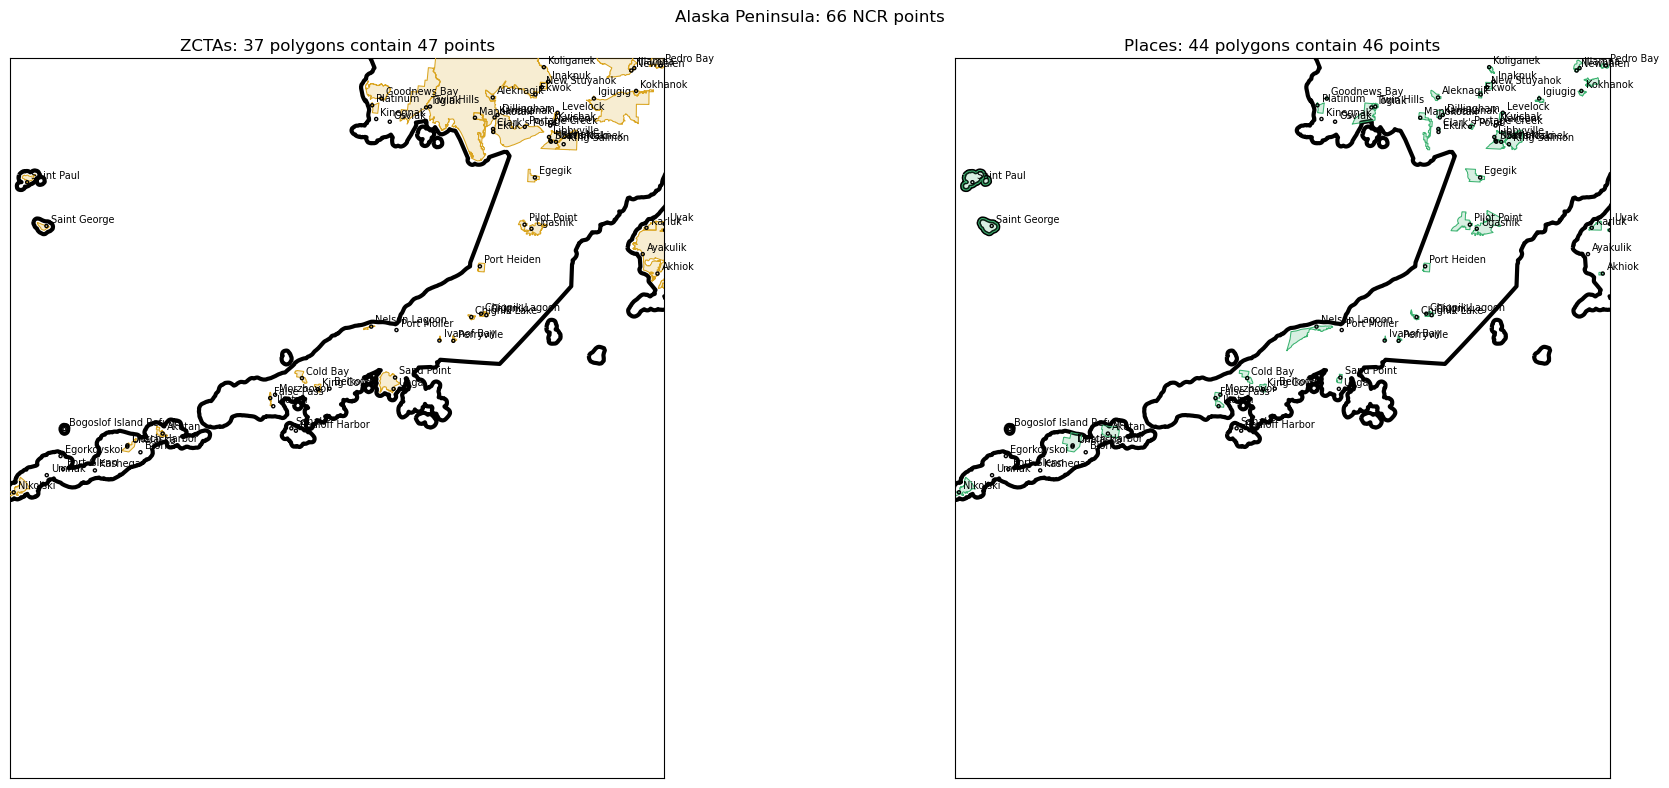

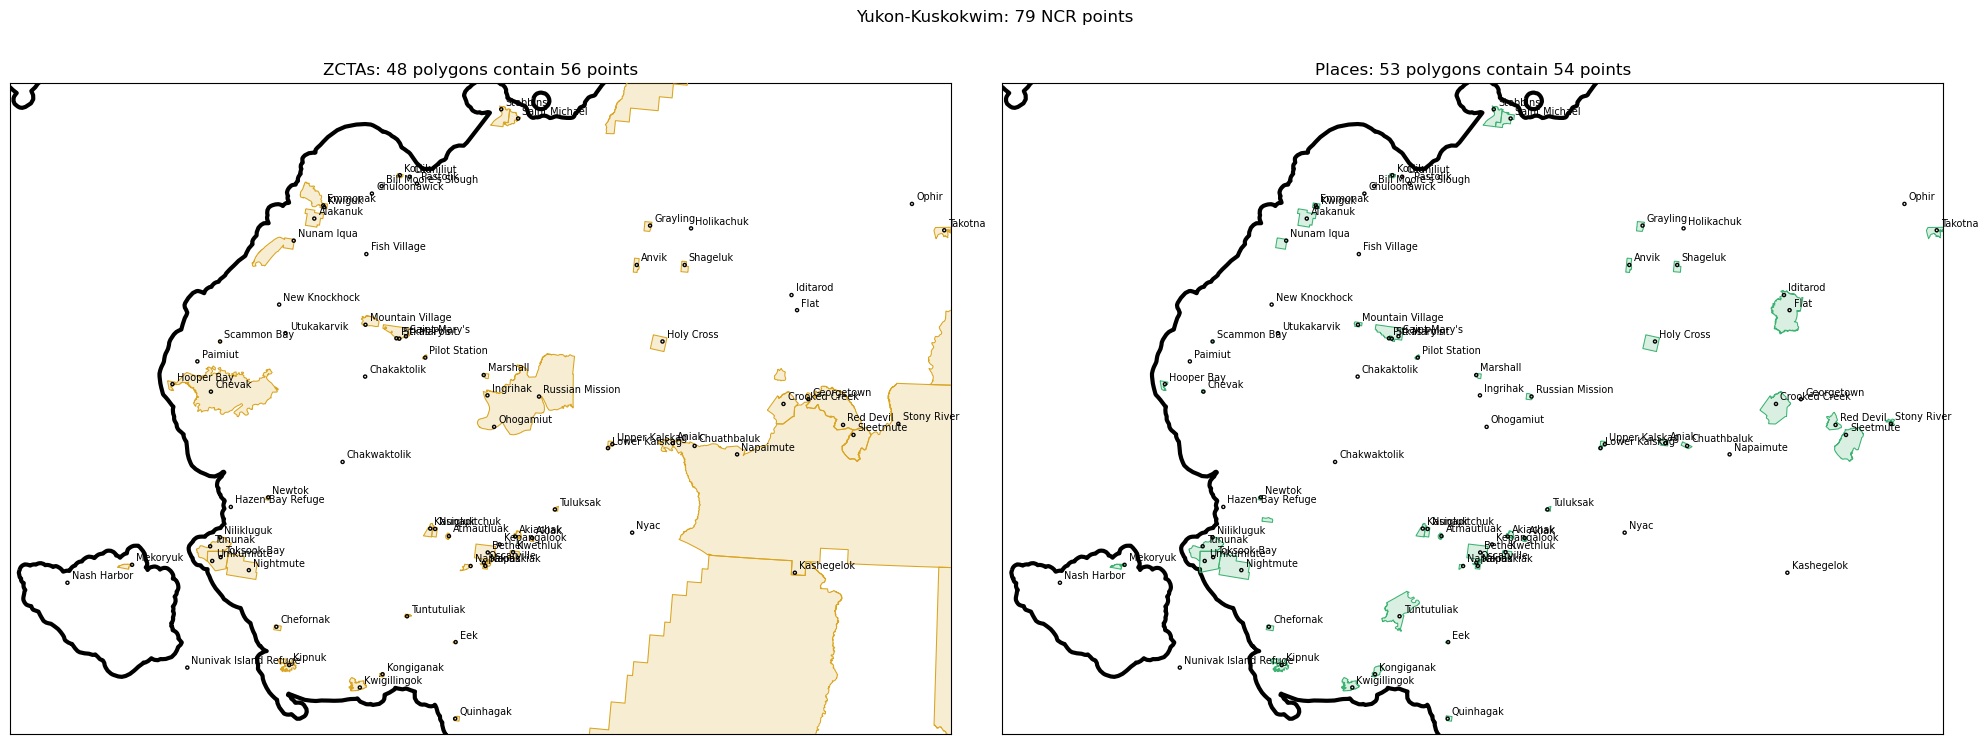

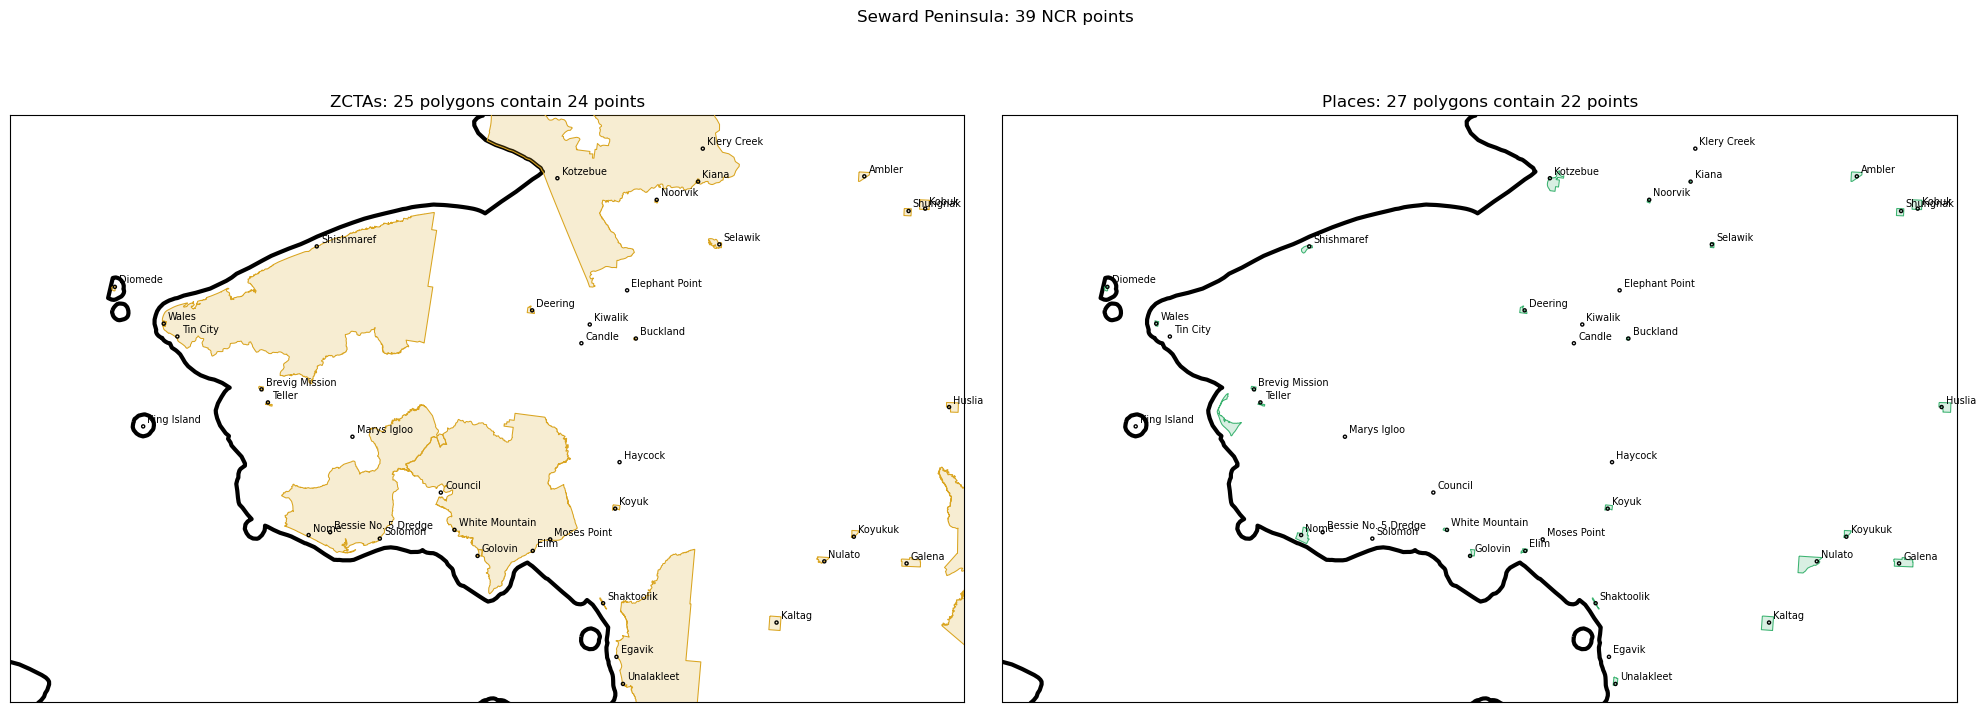

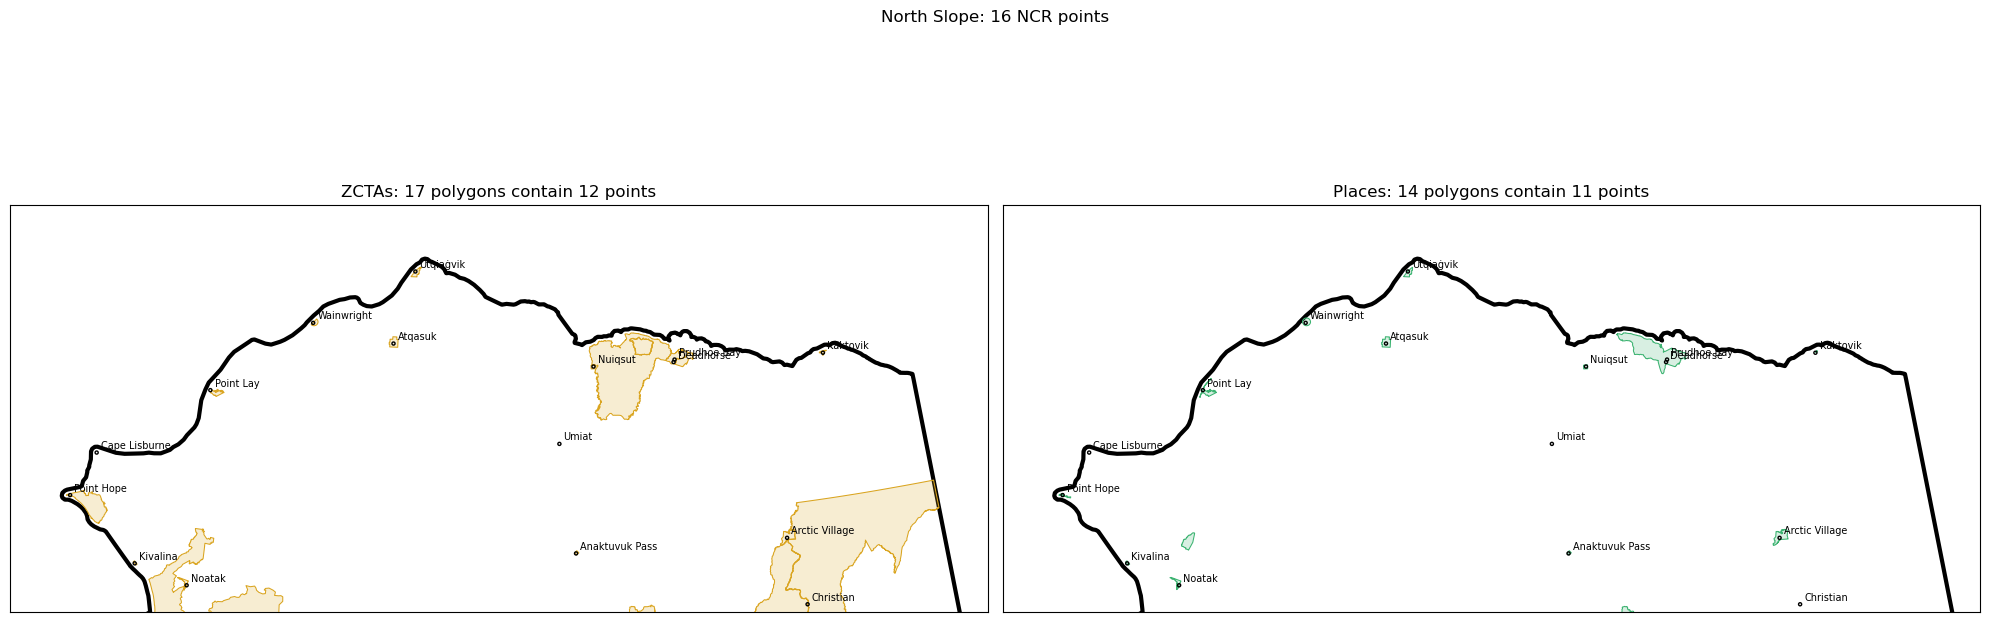

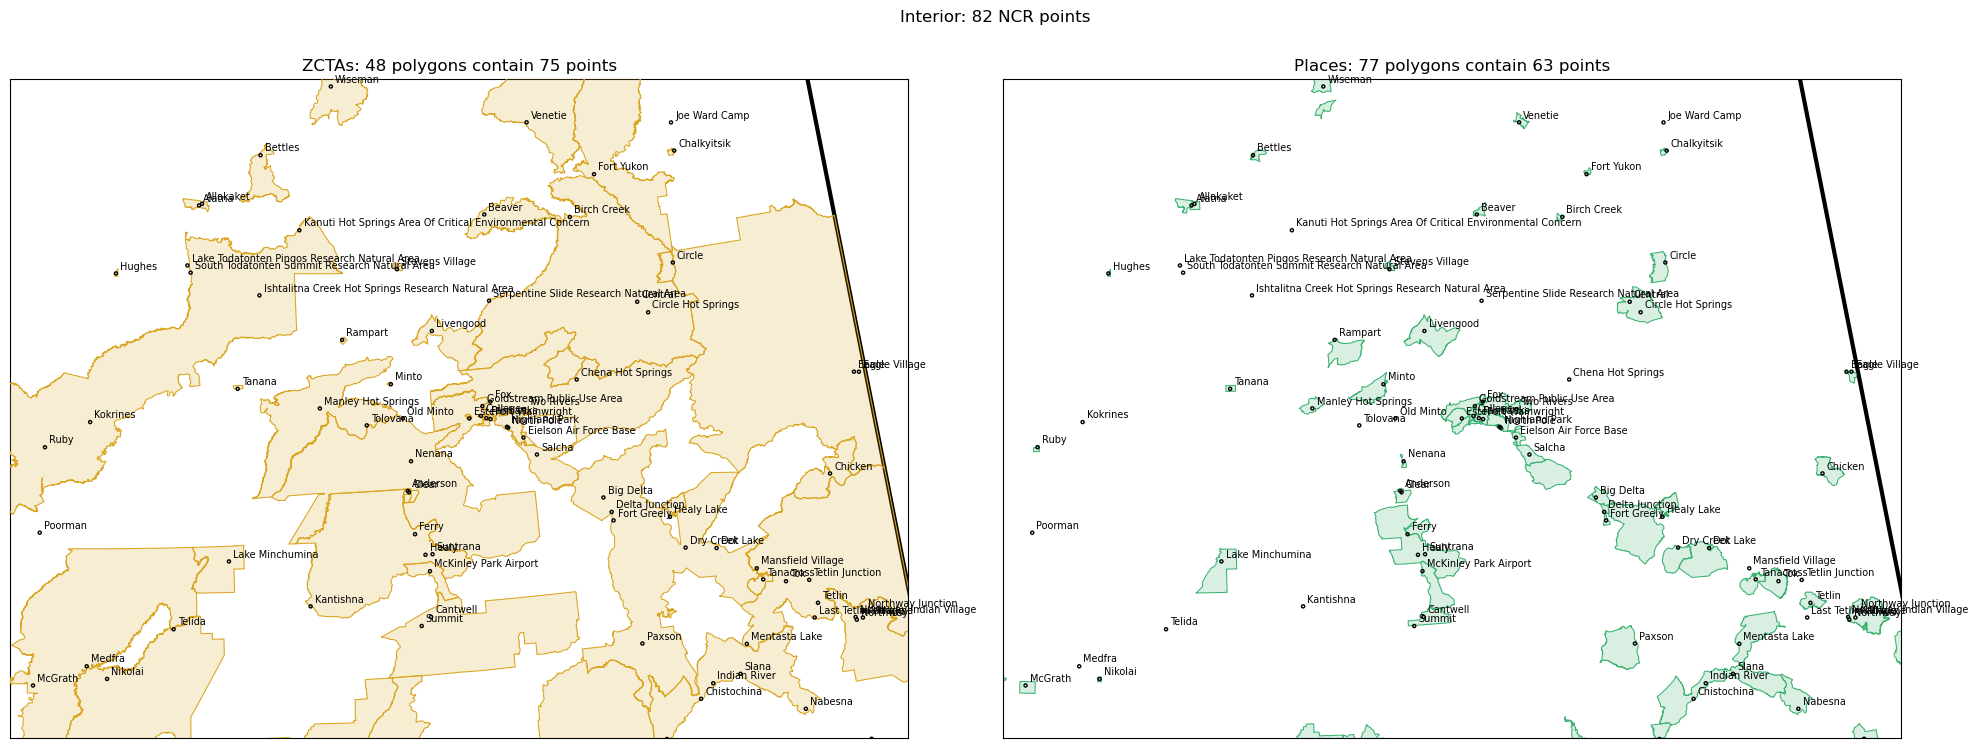

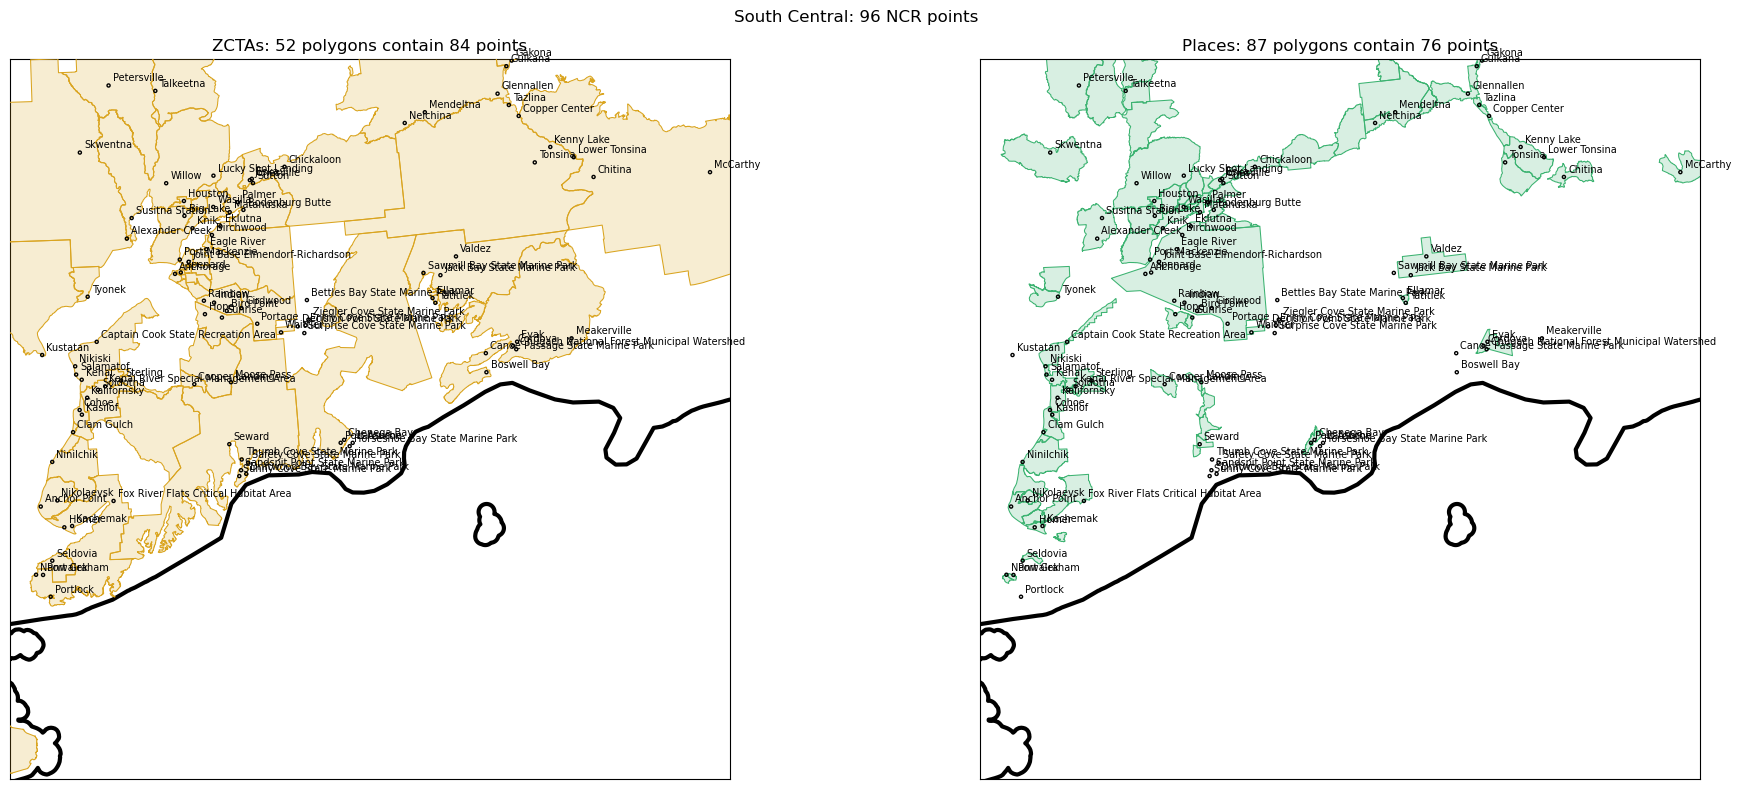

In [13]:
regions_extents = {
    "Southeast":{"xlim":[750000, 1600000], "ylim":[700000, 1250000]},
    "Kodiak":{"xlim":[-250000, 175000], "ylim":[650000, 1000000]},
    "Alaska Peninsula":{"xlim":[-1000000, 0], "ylim":[0, 1100000]},
    "Yukon-Kuskokwim":{"xlim":[-750000, -100000], "ylim":[1100000, 1550000]},
    "Seward Peninsula":{"xlim":[-750000, -100000], "ylim":[1550000, 1950000]},
    "North Slope":{"xlim":[-600000, 600000], "ylim":[1950000, 2450000]},
    "Interior":{"xlim":[-100000, 650000], "ylim":[1400000, 1950000]},
    "South Central":{"xlim":[100000, 600000], "ylim":[900000, 1400000]},
    }

for region in regions_extents.keys():
    # set extent
    xmin, xmax = regions_extents[region]["xlim"][0], regions_extents[region]["xlim"][1]
    ymin, ymax = regions_extents[region]["ylim"][0], regions_extents[region]["ylim"][1]

    # count total features by extent
    n_points = len(ak_points.cx[xmin:xmax, ymin:ymax])
    n_places = len(place.cx[xmin:xmax, ymin:ymax])
    n_zctas = len(zcta.cx[xmin:xmax, ymin:ymax])

    # count point intersection of features in extent
    n_points_in_places = len(ak_points.cx[xmin:xmax, ymin:ymax].sjoin(place.cx[xmin:xmax, ymin:ymax], predicate='within'))
    n_points_in_zctas = len(ak_points.cx[xmin:xmax, ymin:ymax].sjoin(zcta.cx[xmin:xmax, ymin:ymax], predicate='within'))

    # plot
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    fig.suptitle(f"{region}: {n_points} NCR points")

    for i in range(len(ax)):
        ax[i].set_xlim(xmin, xmax)
        ax[i].set_ylim(ymin, ymax)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")

    ak.boundary.plot(ax=ax[0], color="black", linewidth=3, zorder=0)
    #boro.boundary.plot(ax=ax[0], color="lightgray", linewidth=2, zorder=1)
    #place.boundary.plot(ax=ax[0], color="mediumseagreen", linewidth=.75, zorder=2)
    zcta.boundary.plot(ax=ax[0], color="goldenrod", linewidth=.75, zorder=3)
    zcta.plot(ax=ax[0], color="goldenrod", alpha=.2, linewidth=.75, zorder=3)
    ak_points.plot(ax=ax[0], color="black", markersize=5, facecolors='none', zorder=4)
    for x, y, label in zip(ak_points.geometry.x, ak_points.geometry.y, ak_points.name):
        ax[0].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=7)
    ax[0].set_title(f"ZCTAs: {n_zctas} polygons contain {n_points_in_zctas} points")

    ak.boundary.plot(ax=ax[1], color="black", linewidth=3, zorder=0)
    #boro.boundary.plot(ax=ax[1], color="lightgray", linewidth=2, zorder=1)
    place.boundary.plot(ax=ax[1], color="mediumseagreen", linewidth=.75, zorder=2)
    place.plot(ax=ax[1], color="mediumseagreen", alpha=.2, linewidth=.75, zorder=2)
    #zcta.boundary.plot(ax=ax[1], color="goldenrod", linewidth=.75, zorder=3)
    ak_points.plot(ax=ax[1], color="black", markersize=5, facecolors='none', zorder=4)
    for x, y, label in zip(ak_points.geometry.x, ak_points.geometry.y, ak_points.name):
        ax[1].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=7)
    ax[1].set_title(f"Places: {n_places} polygons contain {n_points_in_places} points")

    fig.tight_layout()


Now let's look at some cities. For our purposes, we will define a "city" as being any place name with multiple associated zipcodes. (Note that this list will exclude the JBER military base.) We will use the coordinates of each city to define an extent for plotting. Then we will plot the same two maps as above, plus a third map to show the ZCTA polygons that are associated with that city. The idea here is to map out the same aggregation we would perform with the tabular data, to see the spatial extent of each city as represented by ZCTAs.

From the maps below, it turns out some of the zipcodes returned by our dictionary are not found in the ZCTA polygons, and may represent older or unused zipcodes. This means that Tok, Kodiak, and Ketchikan do not meet the >1 zipcode criteria! Statewide, only Anchorage, Wasilla, Fairbanks, and Juneau are associated with >1 zip code in our zipcode dictionary.

In [14]:
ak_points[ak_points['name'].isin(multiple_zips)]

id       name         alt_name  region country  latitude  longitude  \
14    AK15  Anchorage       Dgheyaytnu  Alaska      US   61.1817   -149.993   
133  AK124  Fairbanks              NaN  Alaska      US   64.8378   -147.716   
191  AK172     Juneau  Dzánti K'ihéeni  Alaska      US   58.3019   -134.420   
211  AK191  Ketchikan        Kichx̱áan  Alaska      US   55.3422   -131.646   
225  AK205     Kodiak           Sun'aq  Alaska      US   57.7900   -152.407   
431  AK399        Tok              NaN  Alaska      US   63.3366   -142.985   
458  AK426    Wasilla              NaN  Alaska      US   61.5814   -149.439   

     km_distance_to_ocean                         geometry  
14                    2.1   POINT (214641.357 1250935.043)  
133                 379.3   POINT (297717.700 1667064.039)  
191                   0.4  POINT (1127899.496 1089938.352)  
211                   0.2   POINT (1391079.161 828573.040)  
225                   0.3     POINT (94469.981 866399.357)  
431                 300.6   POINT (547914.002 1530925.477)  
458                   7.8   POINT (241205.673 1297447.279)

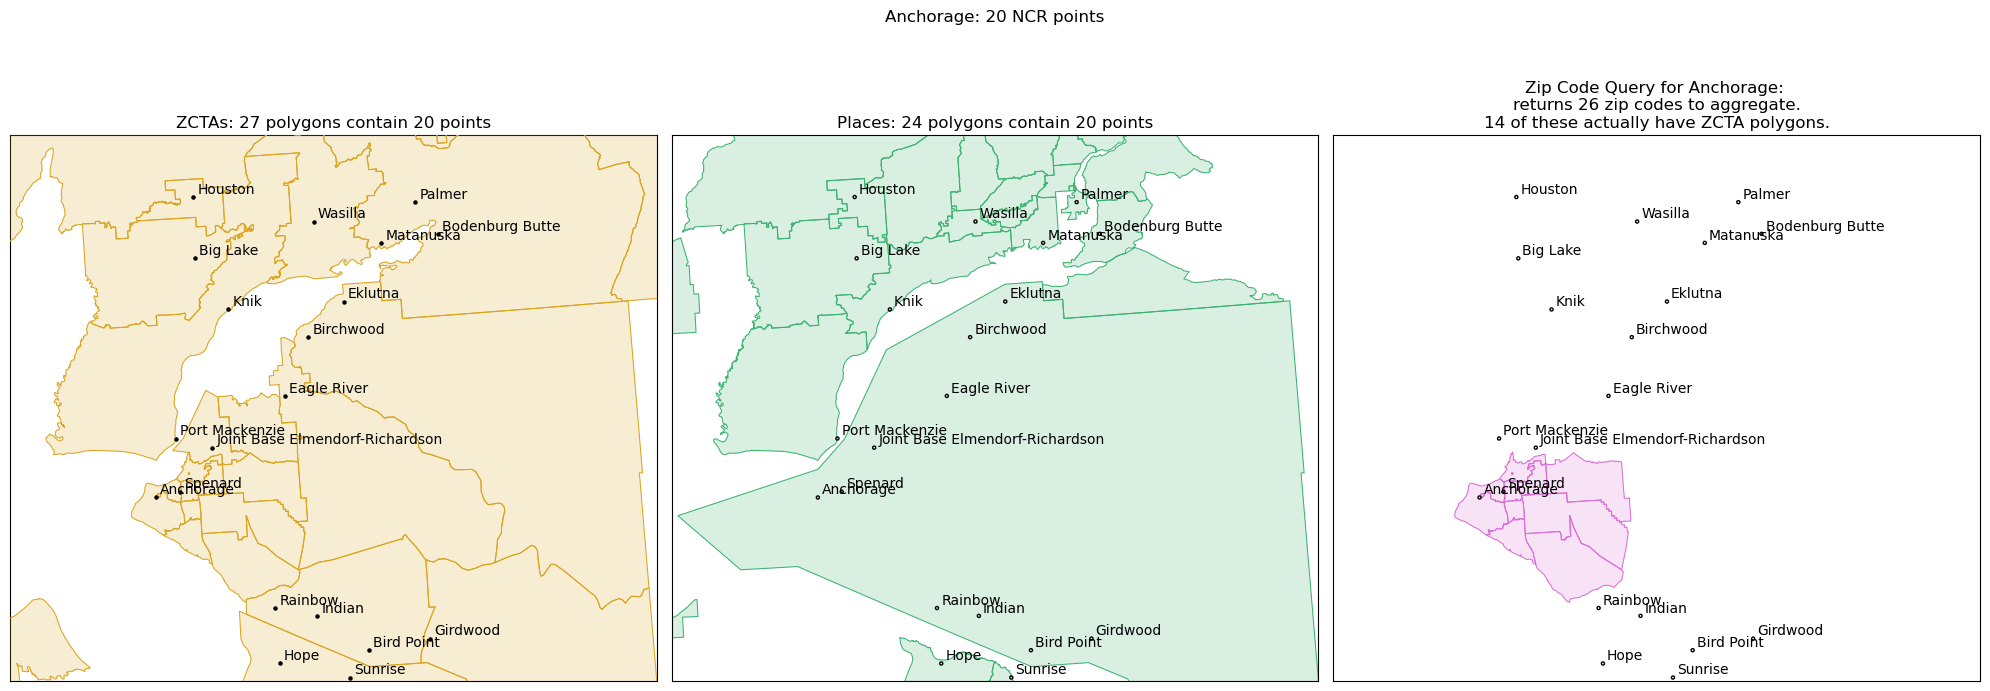

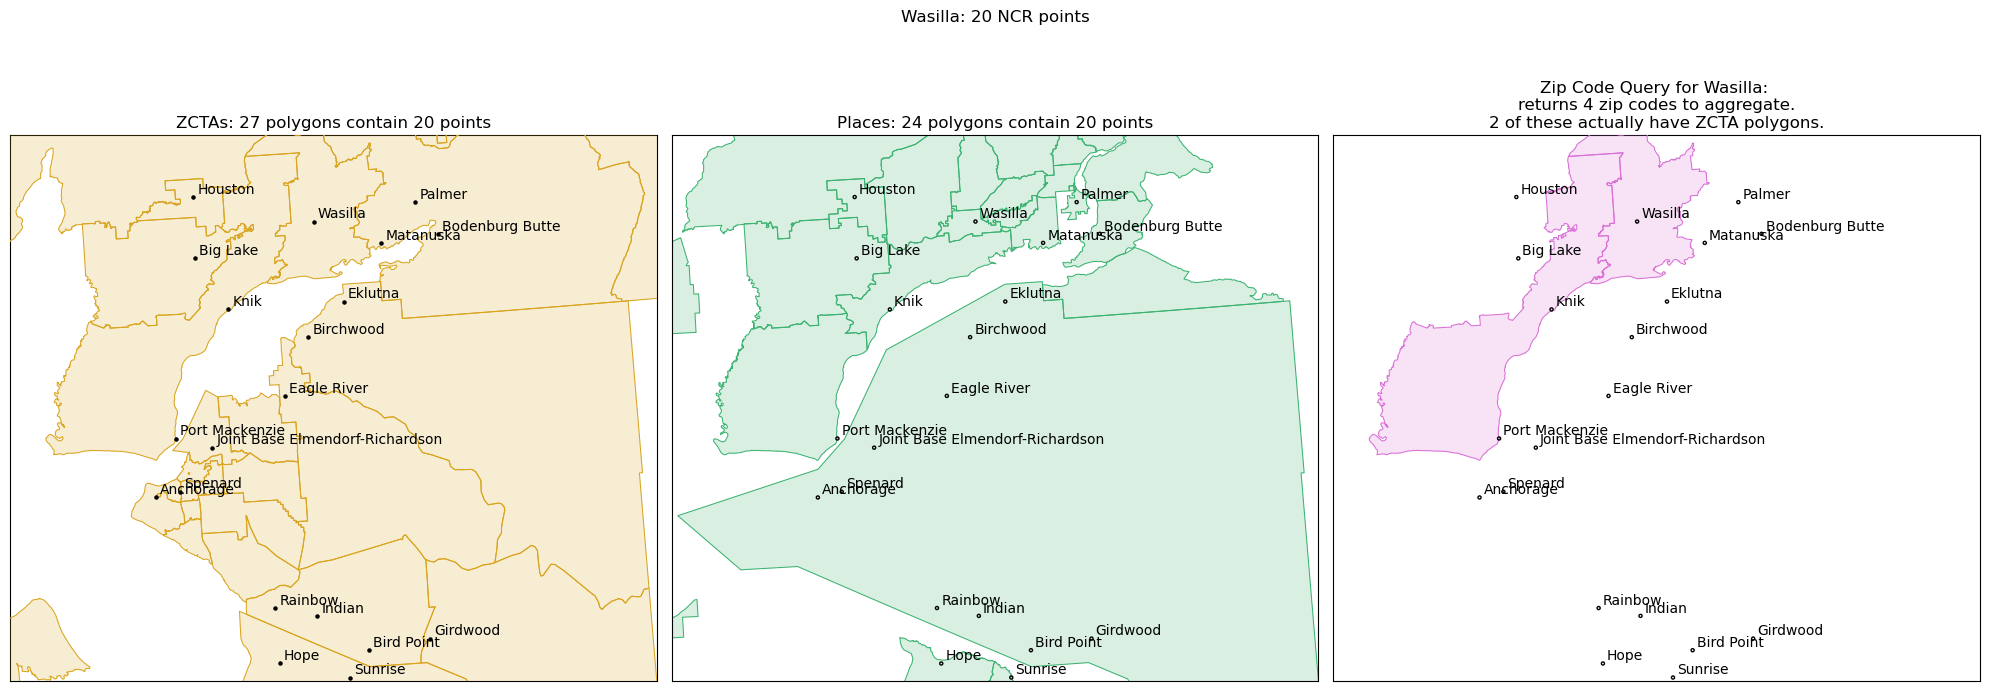

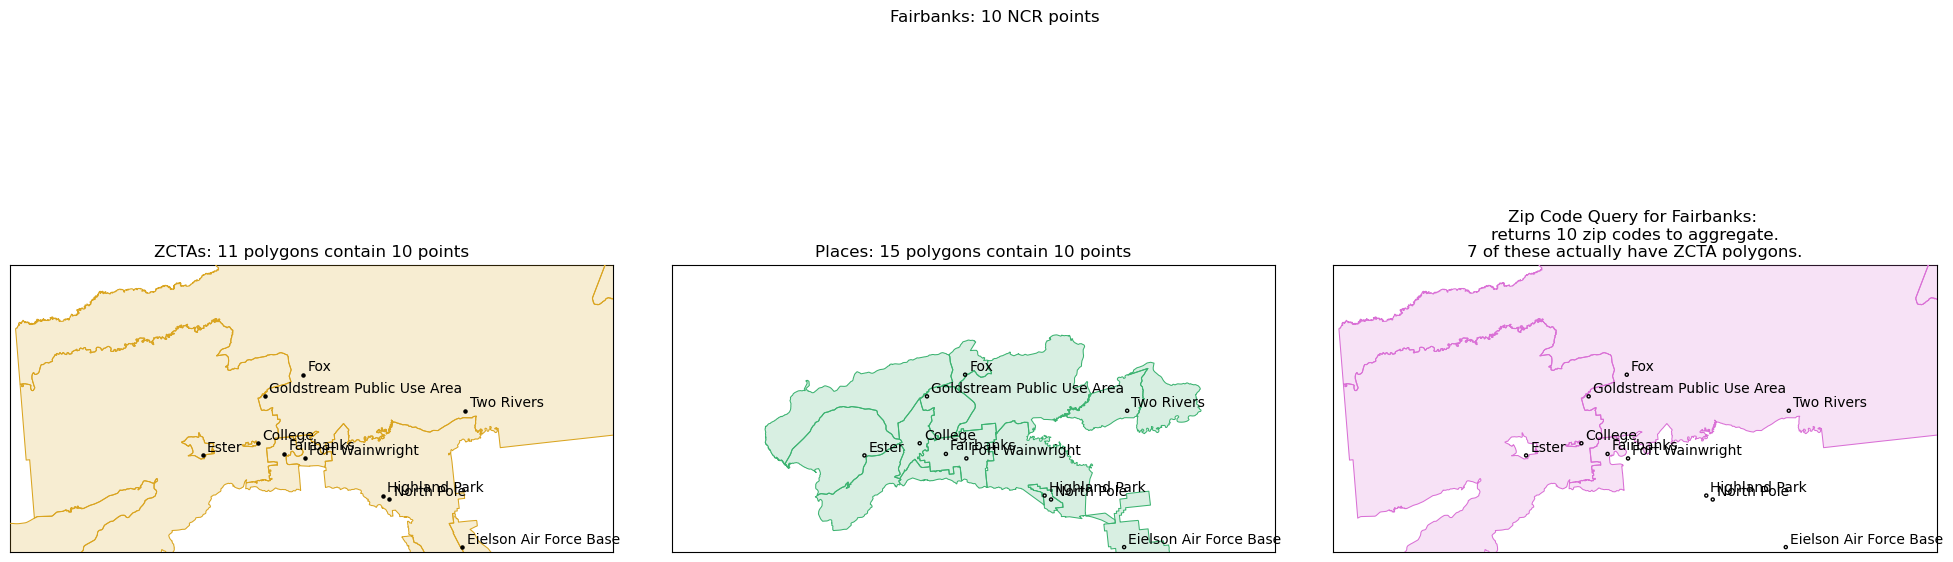

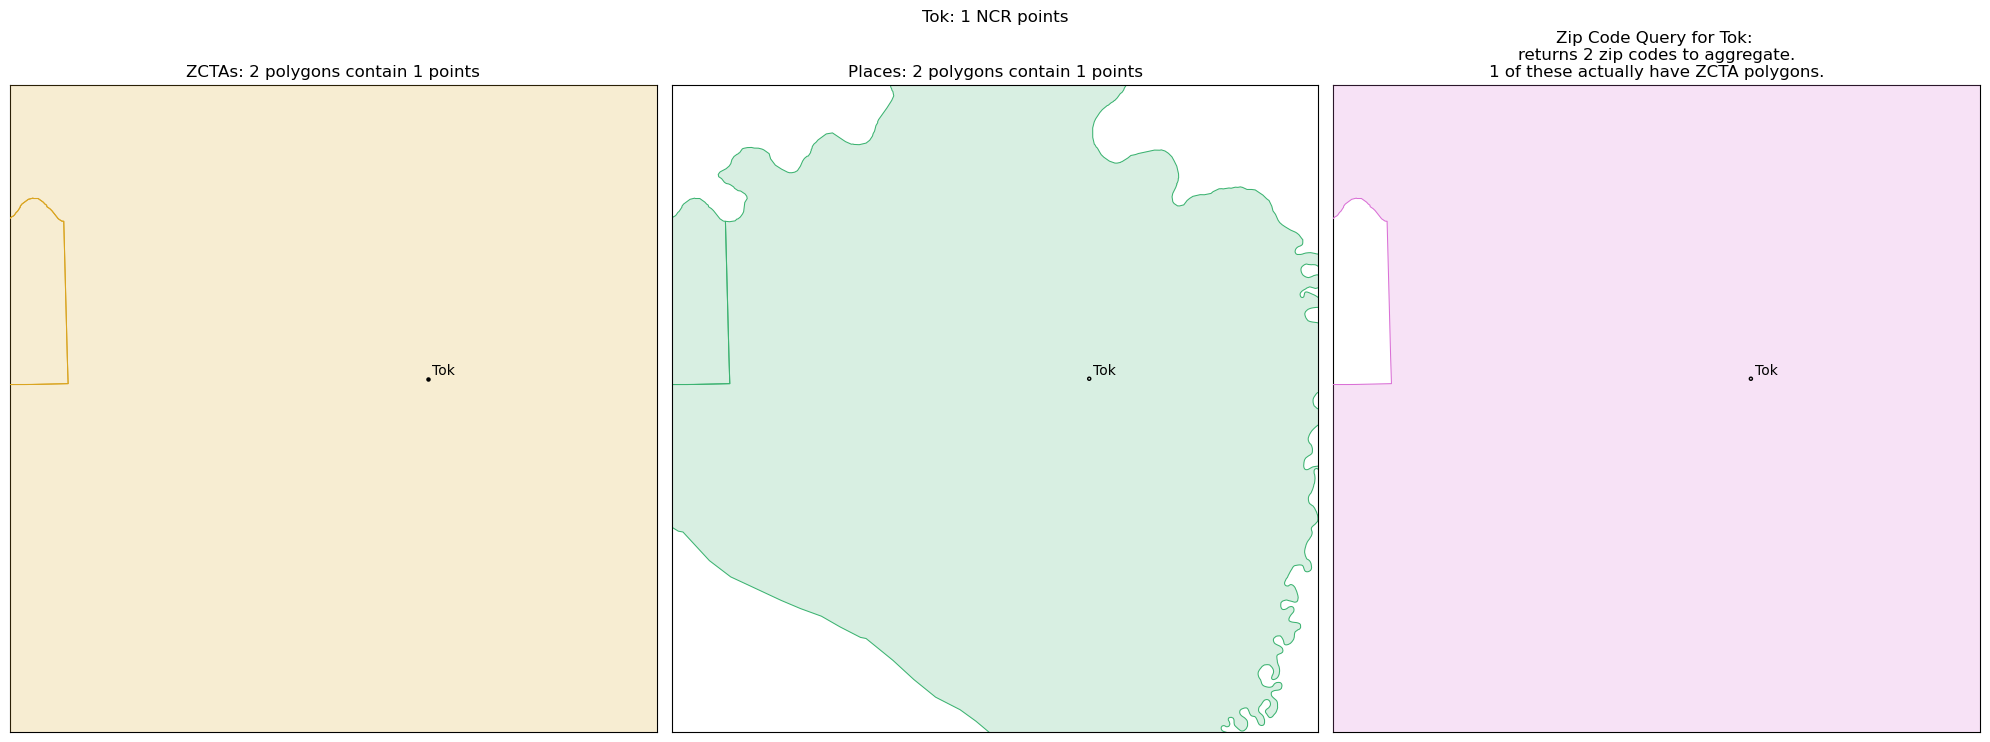

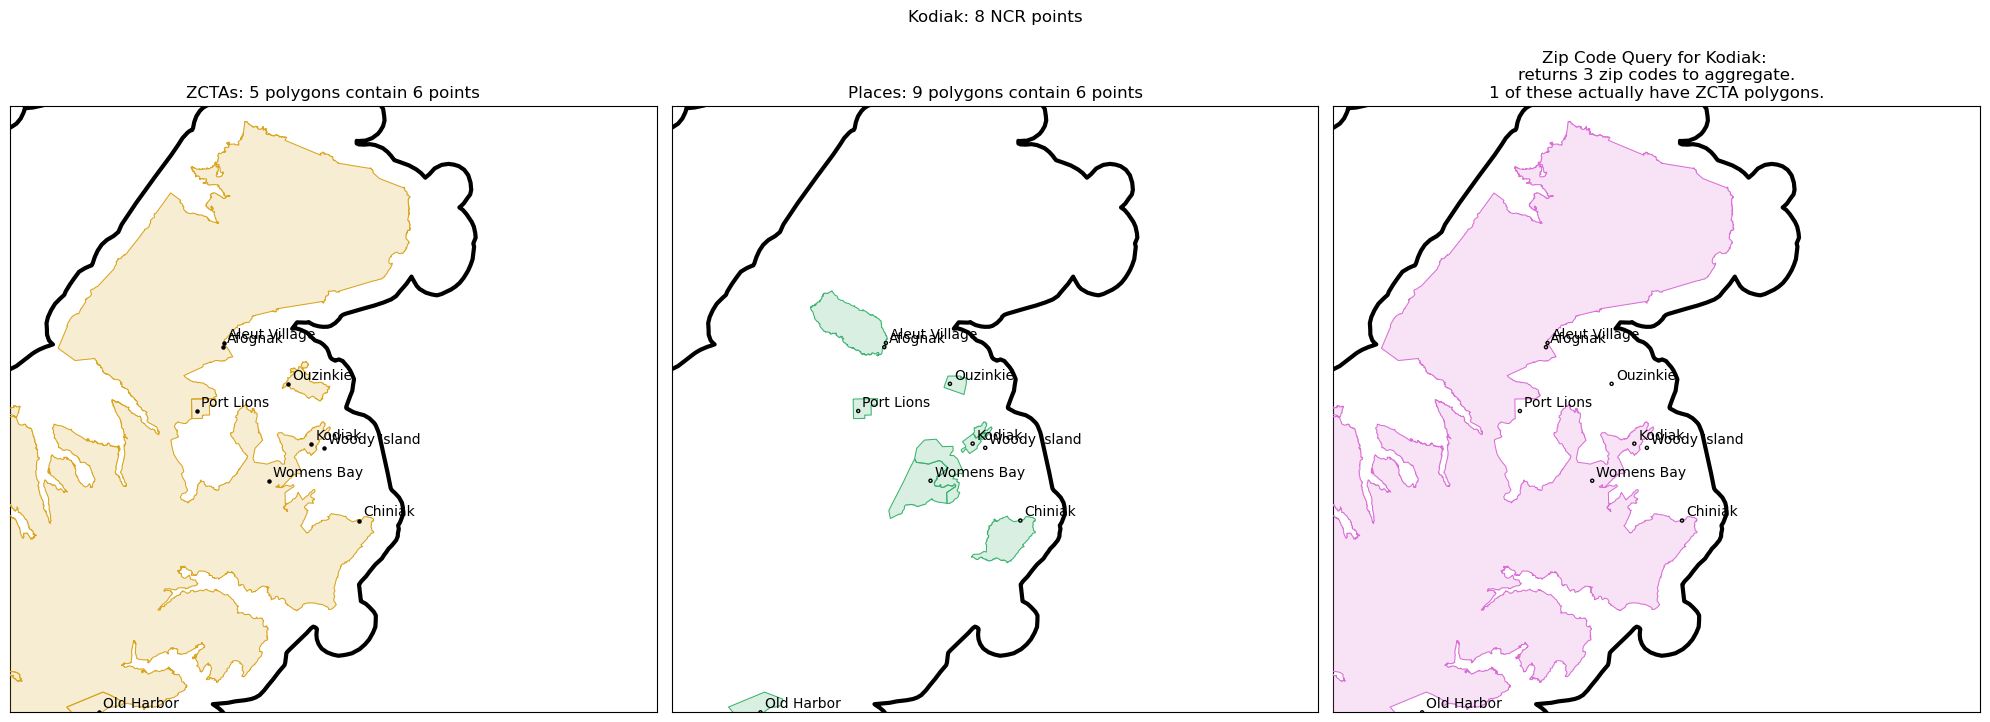

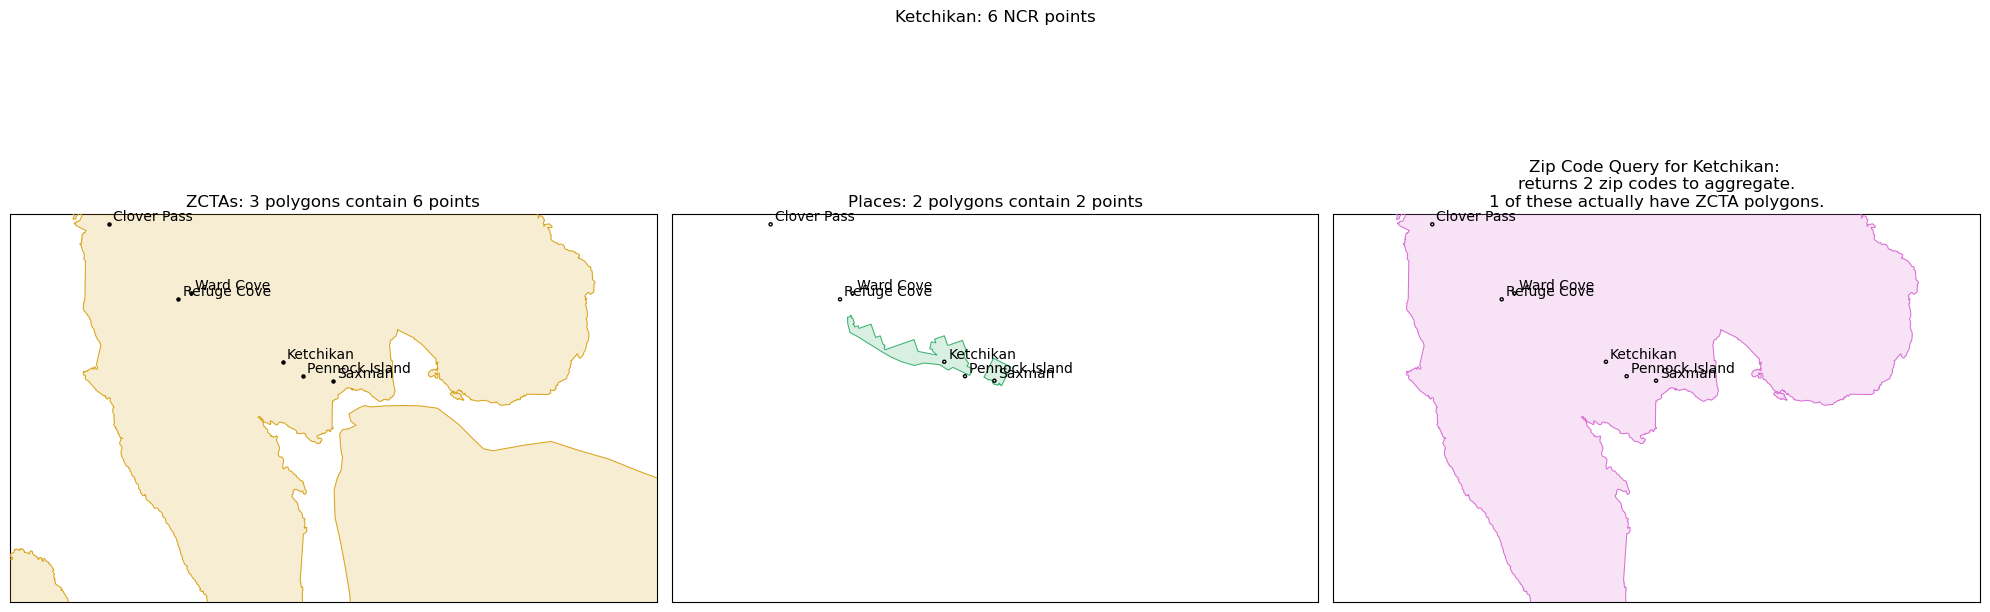

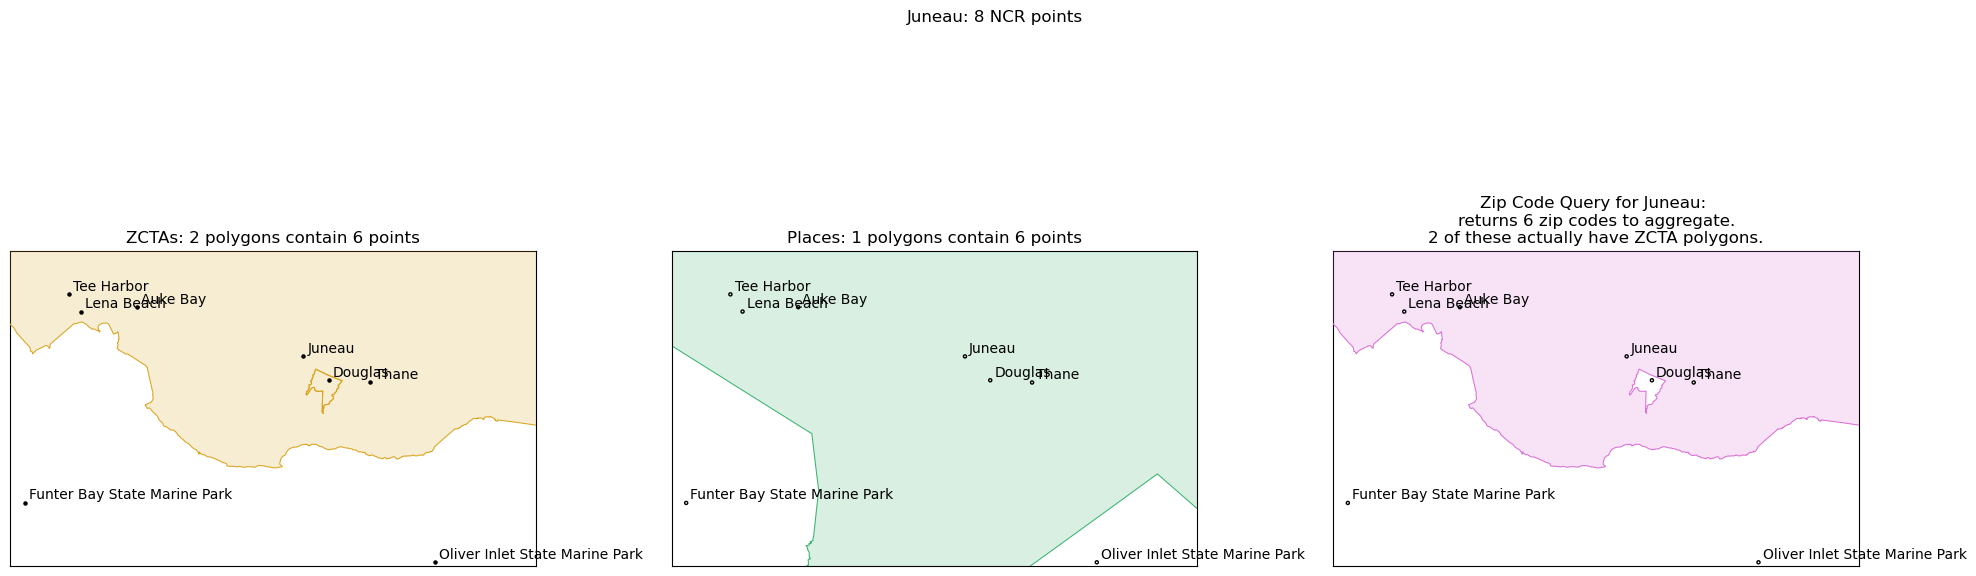

In [15]:
city_extents = {
    "Anchorage":{"xlim":[190000,299000], "ylim":[1220000,1312000]},
    "Wasilla":{"xlim":[190000,299000], "ylim":[1220000,1312000]},
    "Fairbanks":{"xlim":[250000,355000], "ylim":[1650000,1700000]},
    "Tok":{"xlim":[535000,555000], "ylim":[1520000,1540000]},
    "Kodiak":{"xlim":[20000,180000], "ylim":[800000,950000]},
    "Ketchikan":{"xlim":[1370000,1420000], "ylim":[810000,840000]},
    "Juneau":{"xlim":[1100000,1150000], "ylim":[1070000,1100000]},
    }

for city in city_extents.keys():
    # set extent
    xmin, xmax = city_extents[city]["xlim"][0], city_extents[city]["xlim"][1]
    ymin, ymax = city_extents[city]["ylim"][0], city_extents[city]["ylim"][1]

    # count total features by extent
    n_points = len(ak_points.cx[xmin:xmax, ymin:ymax])
    n_places = len(place.cx[xmin:xmax, ymin:ymax])
    n_zctas = len(zcta.cx[xmin:xmax, ymin:ymax])

    # count point intersection of features in extent
    n_points_in_places = len(ak_points.cx[xmin:xmax, ymin:ymax].sjoin(place.cx[xmin:xmax, ymin:ymax], predicate='within'))
    n_points_in_zctas = len(ak_points.cx[xmin:xmax, ymin:ymax].sjoin(zcta.cx[xmin:xmax, ymin:ymax], predicate='within'))

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(20,8))
    fig.suptitle(f"{city}: {n_points} NCR points")

    for i in range(len(ax)):
        ax[i].set_xlim(xmin, xmax)
        ax[i].set_ylim(ymin, ymax)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")

    ak.boundary.plot(ax=ax[0], color="black", linewidth=3, zorder=0)
    #boro.boundary.plot(ax=ax[0], color="lightgray", linewidth=2, zorder=1)
    #place.boundary.plot(ax=ax[0], color="mediumseagreen", linewidth=.75, zorder=2)
    zcta.boundary.plot(ax=ax[0], color="goldenrod", linewidth=.75, zorder=3)
    zcta.plot(ax=ax[0], color="goldenrod", alpha=.2, linewidth=.75, zorder=3)
    ak_points.plot(ax=ax[0], color="black", markersize=5, zorder=4)
    ax[0].set_title(f"ZCTAs: {n_zctas} polygons contain {n_points_in_zctas} points")

    for x, y, label in zip(ak_points.geometry.x, ak_points.geometry.y, ak_points.name):
        ax[0].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

    ak.boundary.plot(ax=ax[1], color="black", linewidth=3, zorder=0)
    #boro.boundary.plot(ax=ax[1], color="lightgray", linewidth=2, zorder=1)
    place.boundary.plot(ax=ax[1], color="mediumseagreen", linewidth=.75, zorder=2)
    place.plot(ax=ax[1], color="mediumseagreen", alpha=.2, linewidth=.75, zorder=2)
    #zcta.boundary.plot(ax=ax[1], color="goldenrod", linewidth=.75, zorder=3)
    ak_points.plot(ax=ax[1], color="black", markersize=5, facecolors='none', zorder=4)
    ax[1].set_title(f"Places: {n_places} polygons contain {n_points_in_places} points")

    for x, y, label in zip(ak_points.geometry.x, ak_points.geometry.y, ak_points.name):
        ax[1].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

    # get and plot associated zip codes only
    zips_to_agg = place_zip_dict[city]
    zcta_subset = zcta[zcta['ZCTA5CE20'].isin(place_zip_dict[city])]


    ak.boundary.plot(ax=ax[2], color="black", linewidth=3, zorder=0)
    zcta_subset.boundary.plot(ax=ax[2], color="orchid", linewidth=.75, zorder=3)
    zcta_subset.plot(ax=ax[2], color="orchid", alpha=.2, linewidth=.75, zorder=3)
    ak_points.plot(ax=ax[2], color="black", markersize=5, facecolors='none', zorder=4)
    ax[2].set_title(f"Zip Code Query for {city}: \nreturns {len(zips_to_agg)} zip codes to aggregate.\n{len(zcta_subset)} of these actually have ZCTA polygons.")

    for x, y, label in zip(ak_points.geometry.x, ak_points.geometry.y, ak_points.name):
        ax[2].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


    fig.tight_layout()
